In [ ]:
# Importing the required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading The Titanic dataset from seaborn
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# checking shape of the data
df.shape

(891, 15)

In [ ]:
# Checking datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Checking the null values in each column
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


There are null values in some columns 'deck' contains lost of null values followed by 'age', and 'embarked' and 'embark_town' have 2 null value each.

As here we are only focusing on EDA we can leave null values as it is. for modeling/predicting we have to handle these null values.


In [ ]:
# Statistical summary of Numerical variables
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Value Counts for Categorical Variables
print(df['sex'].value_counts())
print(df['class'].value_counts())
print(df['embark_town'].value_counts())
print(df['survived'].value_counts())

sex
male      577
female    314
Name: count, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
survived
0    549
1    342
Name: count, dtype: int64


**Ploting Count plot of the categorical variables**

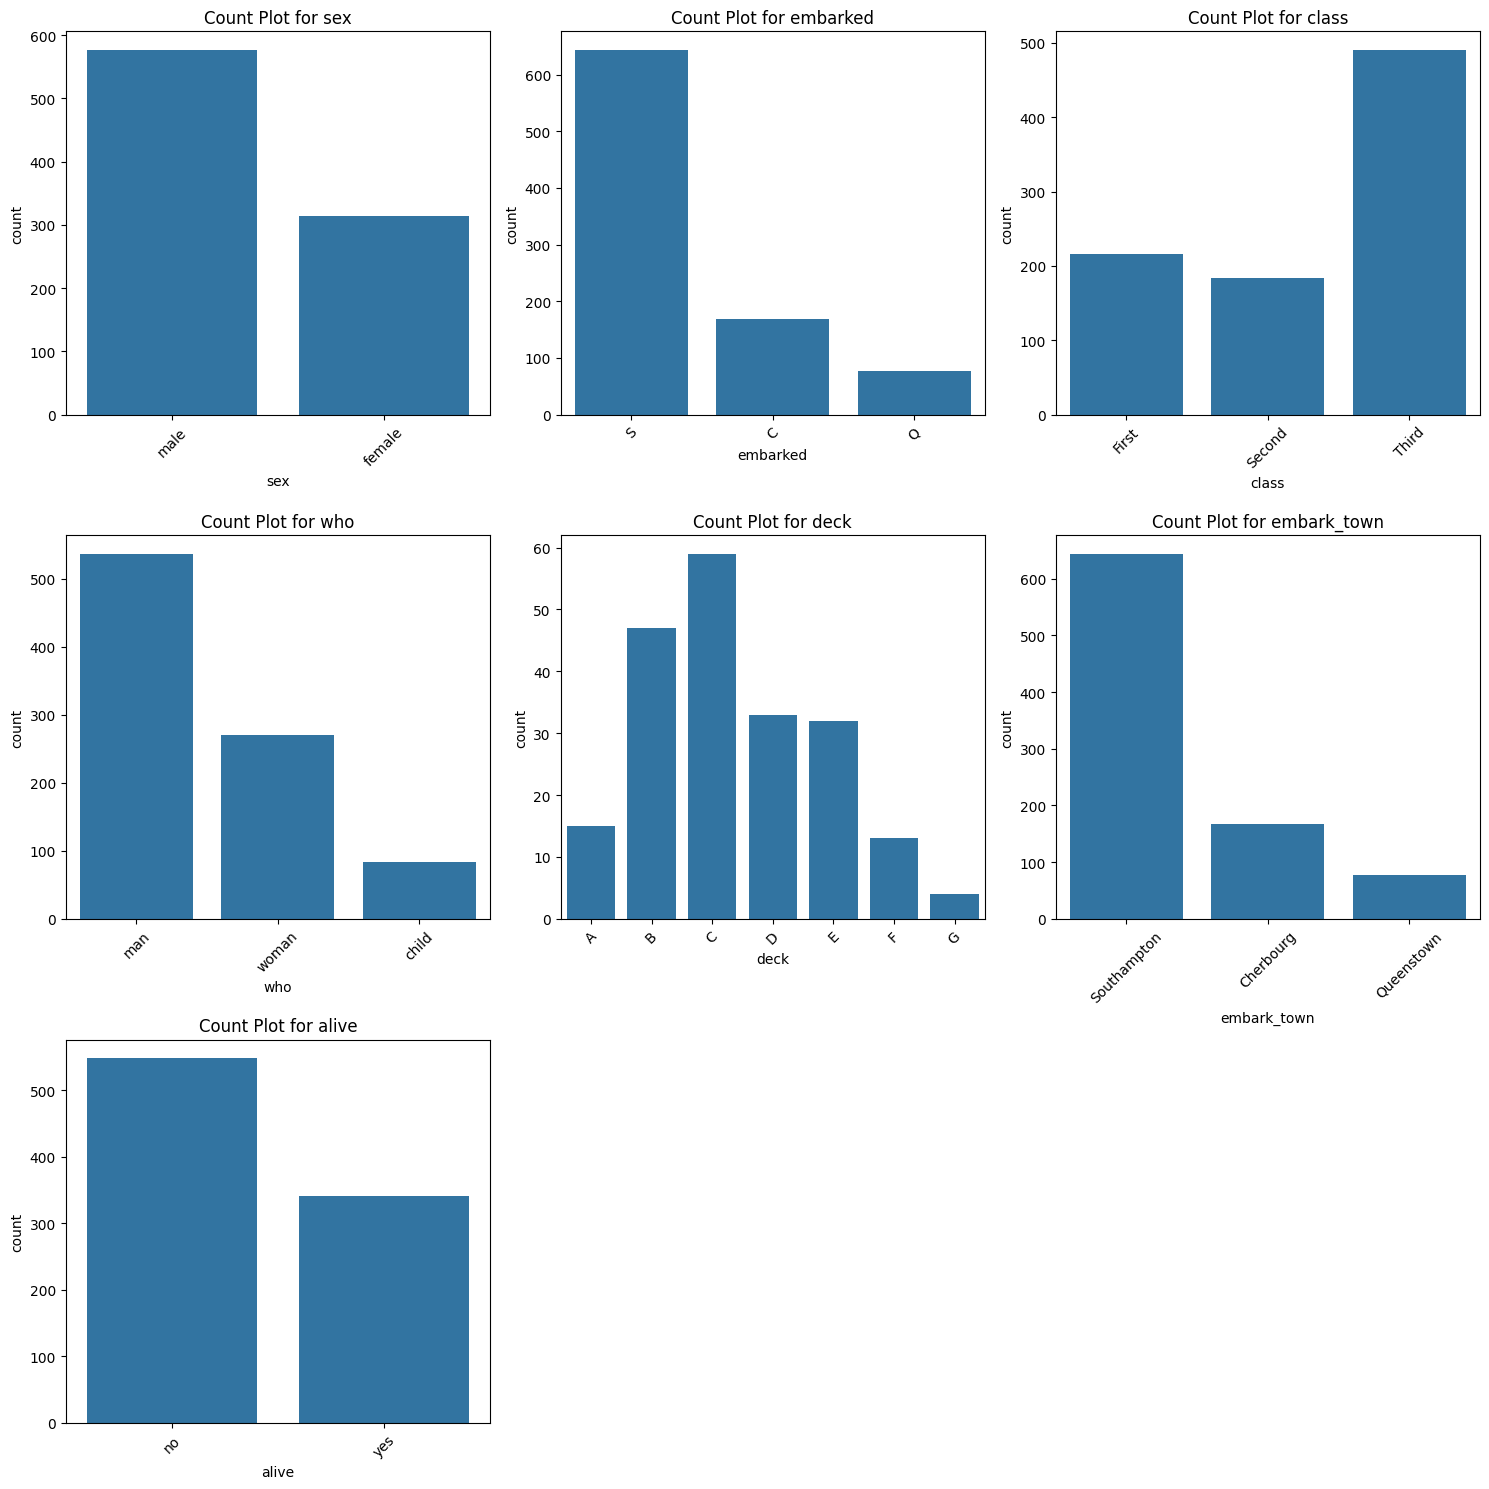

In [ ]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Set up the subplot grid
n = len(cat_cols)
rows = (n // 3) + (n % 3 > 0)  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

# Loop and plot
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Observations**
1. Most passengers were male, indicating a gender imbalance on board.
2. Southampton was the primary boarding point, far exceeding Cherbourg and Queenstown.
3. Third-class passengers formed the largest group, followed by first and second class.
4. The majority of passengers were adults labeled as “man,” with fewer women and very few children.
5. Deck information is sparse, but deck C had the highest recorded count among those known.
6. Most passengers did not survive, as shown by the higher “no” count in the alive variable.

**Distribution of Age**

<Axes: xlabel='age', ylabel='Count'>

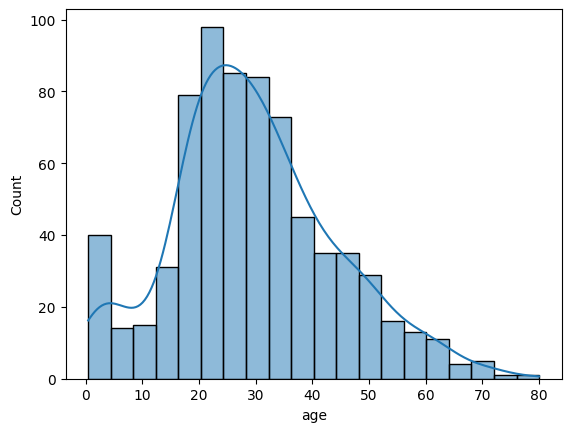

In [ ]:
sns.histplot(data=df, x='age', kde=True)


1. Most passengers were between 20 and 30 years old, showing a young adult majority on board.

2. There is a noticeable drop in counts after age 40, with very few passengers above 60.

3. A smaller but visible group of infants and young children is also present, indicated by the small peak near age 0–5.

**Age distribution by survival**

<Axes: xlabel='age', ylabel='Count'>

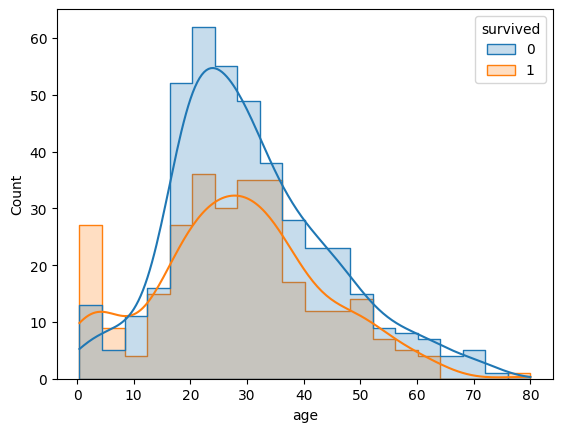

In [ ]:
sns.histplot(data=df, x='age', hue='survived', kde=True, element='step')


1. Survivors were more concentrated in the 20–40 age range, with a small but noticeable survival peak among young children under 5.
2. Non-survivors dominated most age groups, especially between 20–30 years, showing the largest gap in survival rates.
3. Elderly passengers (above 60) had low counts overall, and survival in this group was rare.

**Fare distribution**

<Axes: xlabel='class', ylabel='fare'>

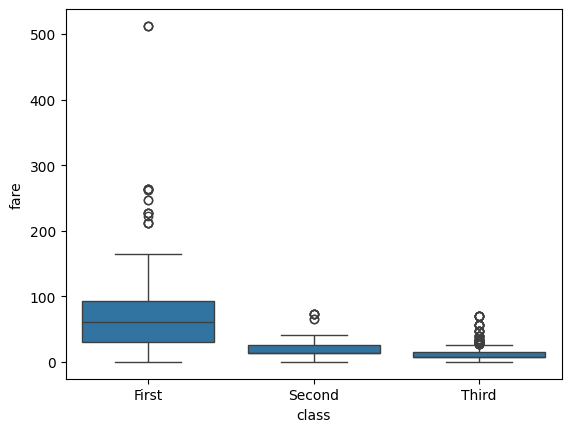

In [ ]:
sns.boxplot(data=df, x='class', y='fare')


1. First-class passengers paid the highest fares, with a wide spread and several extreme outliers above 200, even reaching over 500.
2. Second-class fares were moderately priced with less variation, while third-class fares were the lowest and most tightly clustered.
3. Outliers exist in all classes, but they are far more extreme in first class, indicating some exceptionally expensive tickets.


Gender and Survival

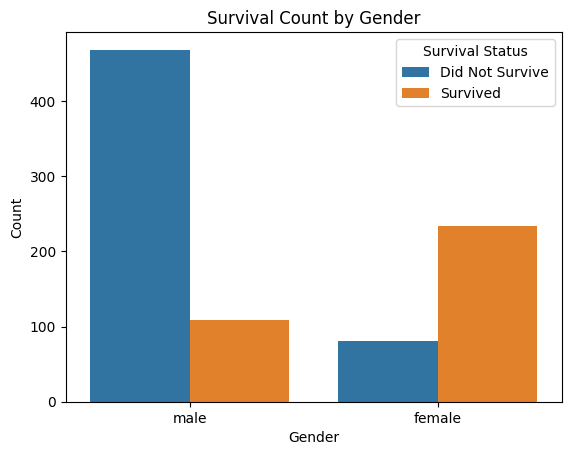

In [ ]:
sns.countplot(data=df, x='sex', hue='survived')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(title='Survival Status', labels=['Did Not Survive', 'Survived'])
plt.show()



1. Most male passengers did not survive, with non-survivors vastly outnumbering survivors in this group.
2. In contrast, female passengers had a much higher survival rate, with survivors outnumbering non-survivors by a large margin.
3. This reflects the strong “women and children first” evacuation priority during the disaster.

**Heatmap**

<Axes: >

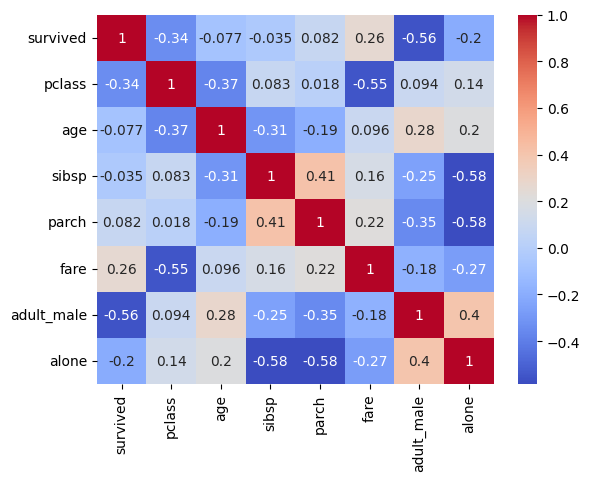

In [ ]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm', annot=True)

1. Passengers in higher classes tended to survive more, as shown by the negative correlation between pclass and survived.

2. Being an adult male was strongly associated with lower survival chances, while higher fares were moderately linked to better survival.

3. Older passengers had a slight tendency to survive more often, though the relationship is weak.

4. Having more siblings/spouses or parents/children aboard was linked to lower survival chances, especially when traveling with larger groups.

5. Traveling alone showed a mild negative relationship with survival, but its effect was weaker than class or gender.

Age vs Fare Scatter plot

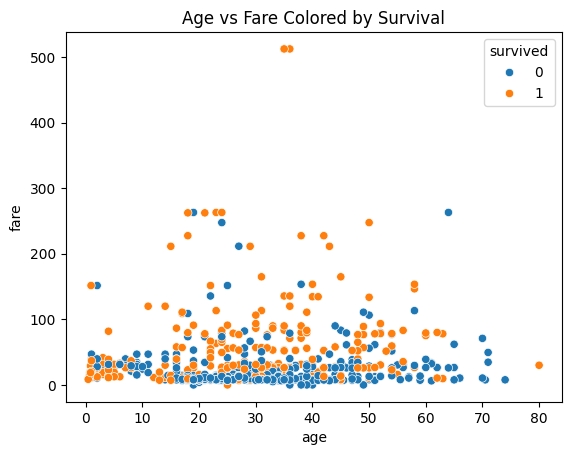

In [ ]:
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.title("Age vs Fare Colored by Survival")
plt.show()


1. Both survivors (orange) and non-survivors (blue) are spread across all ages and fares.

2. Higher fares are more often associated with survivors, especially in the upper range above 200.

3. Most passengers, regardless of survival, paid low fares and were concentrated in the younger to middle-aged range.

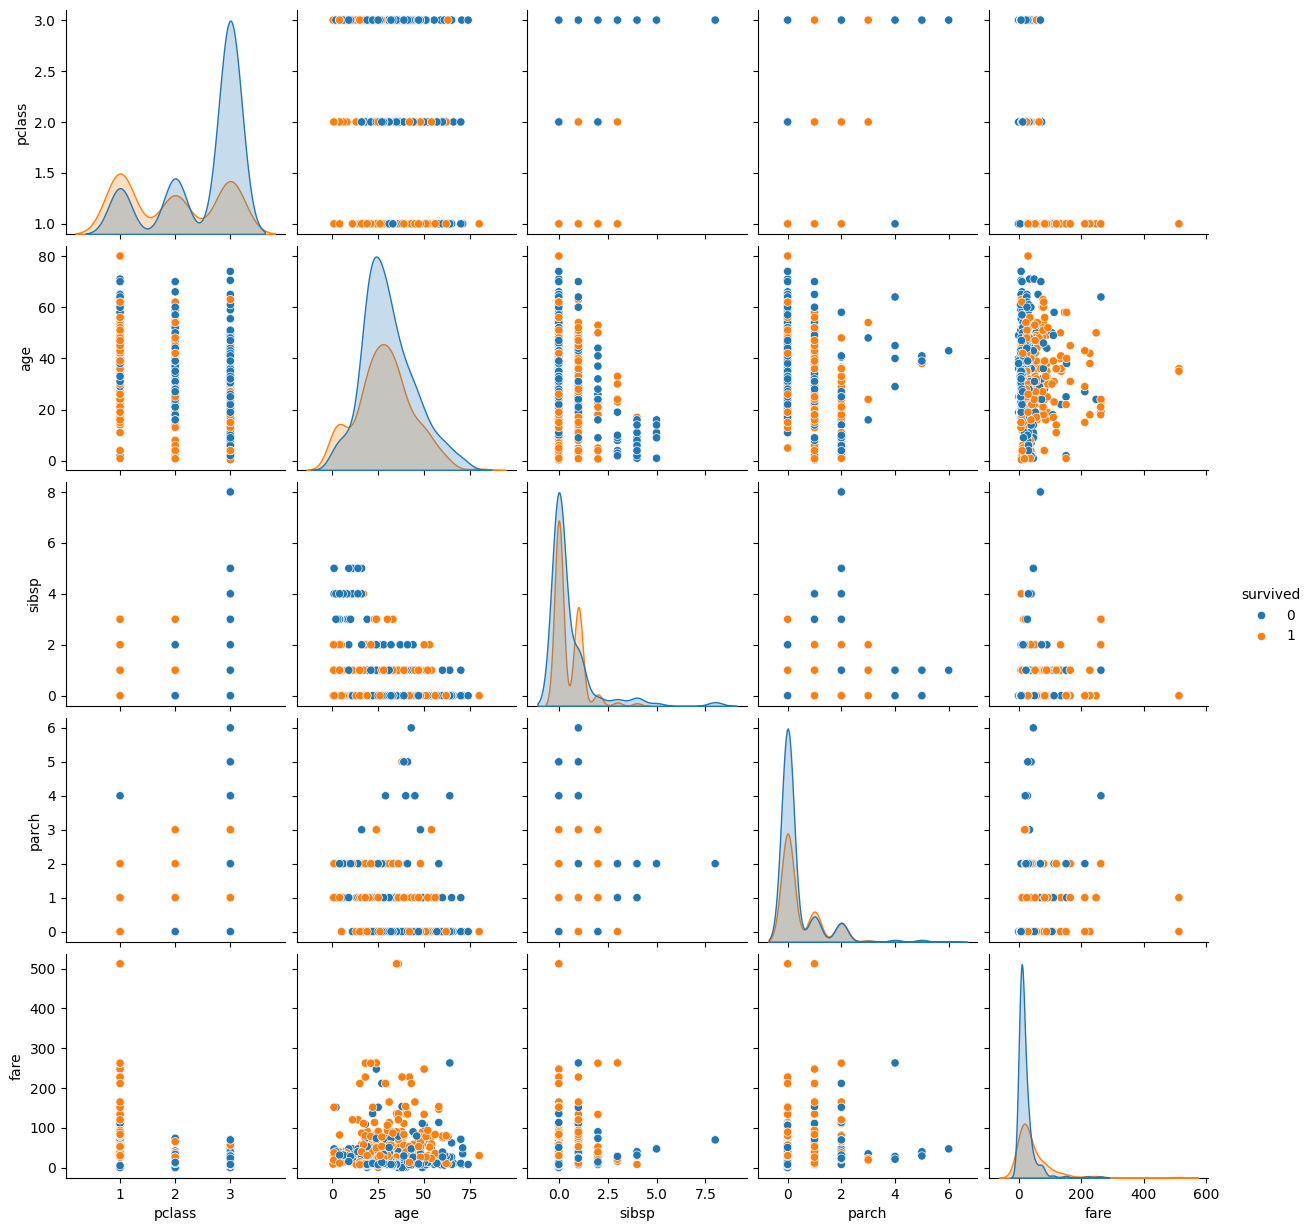

In [ ]:
sns.pairplot(df.select_dtypes(include='number'), hue='survived')


1.Class and Survival

More survivors (orange) are concentrated in 1st and 2nd class, while most 3rd class passengers (blue) did not survive.

2.Age Distribution

Survivors and non-survivors span all ages, but there is a higher survival proportion among younger passengers and children.

3.Fare and Survival

Higher fares are strongly linked to survival; many high-fare payers (likely 1st-class) survived.

Low fares dominate among non-survivors.

4.SibSp (Siblings/Spouses Aboard)

Most passengers had 0 or 1 sibling/spouse aboard.

Larger family groups (>3 SibSp) had lower survival rates.

5.Parch (Parents/Children Aboard)

Most had 0 parents/children aboard.

Small family groups (Parch = 1–3) had better survival chances compared to being alone or with very large families.